# OpenCV Example

conda install -c menpo opencv

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
img = cv2.imread('./image/messi5.jpg', 0)

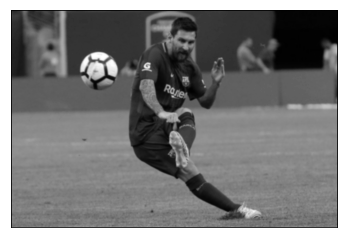

In [3]:
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])
plt.show()

## Draw line

In [4]:
img = np.zeros((512,512,3), np.uint8)

In [5]:
img = cv2.line(img, (0,0),(511,511),(255,0,0),5)

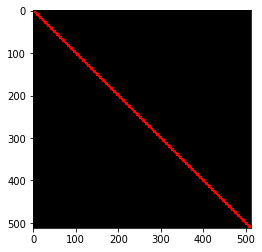

In [6]:
plt.imshow(img)
plt.show()

## Access a pixel value

In [11]:
img = cv2.imread('./image/messi5.jpg')

In [17]:
px = img[100,100]
px

array([137, 128, 131], dtype=uint8)

In [18]:
blue = img[100,100,0]
blue

137

## Region of interest

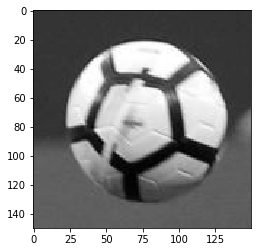

In [34]:
img = cv2.imread('./image/messi5.jpg', 0)
ball = img[105:255, 180:330]
plt.imshow(ball, cmap='gray')
plt.show()

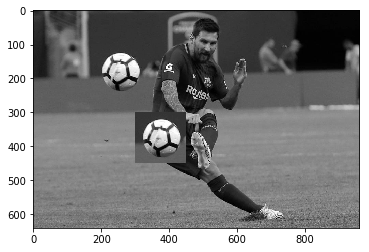

In [35]:
img[300:450, 300:450] = ball
plt.imshow(img, cmap='gray')
plt.show()

## Split and Merge

b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

### or

b = img[:,:,0]

> Numpy indexing is much more efficient and should be used if possible

## Image Blending

To add two images as per the equation below 
- same dtype, pixel and dimension

In [57]:
img1 = cv2.imread('./image/ml.png')
img2 = cv2.imread('./image/opencv_logo.jpg')

In [58]:
dst = cv2.addWeighted(img1, 0.7, img2, 0.3, 0)

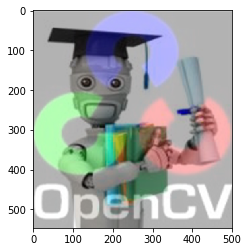

In [59]:
plt.imshow(dst)
plt.show()

## Changing Colorspaces

### Parmeters 
- src - input image
- dst - output image of the same size and depth as src.
- code - color space conversion code (see the description below)

## Conversion code

In [65]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

## Image Thresholding

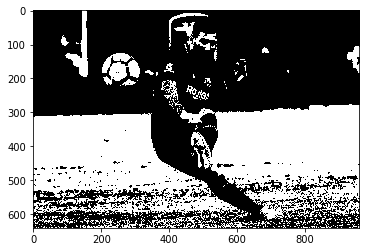

In [78]:
img = cv2.imread('./image/messi5.jpg', 0)
ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
plt.imshow(thresh1, cmap='gray')
plt.show()

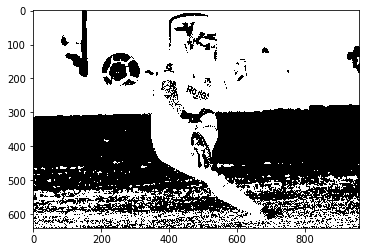

In [79]:
ret, thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2, cmap='gray')
plt.show()

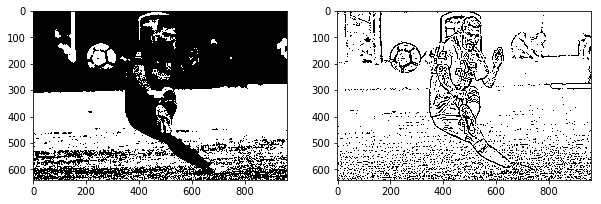

In [125]:
images = [thresh1, thresh2]

for i in range(2):
    plt.figure(1, figsize=(10,11))
    plt.subplot(1,2,i+1), plt.imshow(images[i], cmap='gray')
plt.show()

## Adaptive Thresholding

In [151]:
img = cv2.imread('./image/messi5.jpg', 0)
img2 = cv2.medianBlur(img, 5)

In [152]:
ret, thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
thresh2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11, 2)
thresh3 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11, 2)

In [153]:
images = [img2, thresh1, thresh2, thresh3]

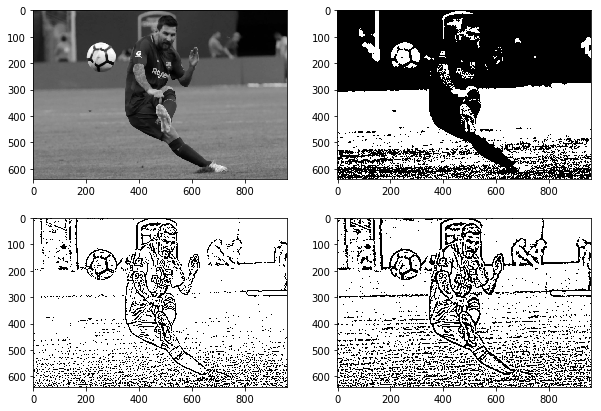

In [160]:
for i in range(4):
    plt.figure(1, figsize=(10,7))
    plt.subplot(2,2,i+1), plt.imshow(images[i], cmap='gray')
plt.show()

## Scaling

### Resize the image

In [161]:
img = cv2.imread('./image/messi5.jpg', 0)

In [162]:
res = cv2.resize(img,None,fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

### or

In [166]:
height,width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation=cv2.INTER_CUBIC)

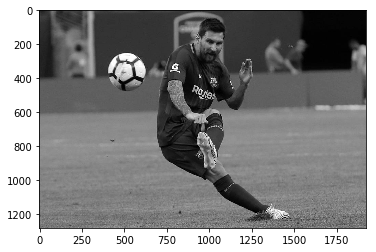

In [168]:
plt.figure(1)
plt.imshow(res, cmap='gray')
plt.show()

## Translation

### Transformation matrix

$$M = \left[\begin{array}{rrr} 
1&0&{t}_x\\
0&1&{t}_y\\
\end{array}\right]$$

Do (100, 50) shift

In [172]:
img = cv2.imread('./image/messi5.jpg', 0)
rows, cols = img.shape

In [204]:
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))

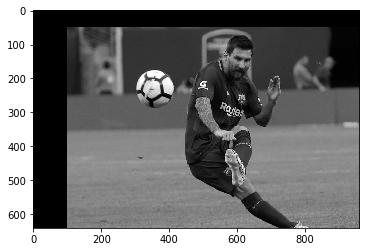

In [205]:
plt.imshow(dst, cmap='gray')
plt.show()

Do (500, 50) shift

In [206]:
M = np.float32([[1,0,500],[0,1,50]])
dst = cv2.warpAffine(img, M, (cols, rows))

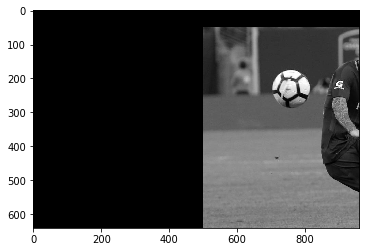

In [207]:
plt.imshow(dst, cmap='gray')
plt.show()

## Rotation

### Rotation Matrix

$$M = \left[\begin{array}{rrr} 
cos{\theta}&-sin{\theta}\\
sin{\theta}&cos{\theta}\\
\end{array}\right]$$

### Modified matrix for scaled rotation

$$\left[\begin{array}{rrr} 
{\alpha}&{\beta}&(1-{\alpha})*centerx-{\beta}*centery\\ 
-{\beta}&{\alpha}&{\beta}*centerx+(1-{\alpha}*centery\\
\end{array}\right]$$

### Do 90 degree rotation with respect to center (no scaling)

In [208]:
img = cv2.imread('./image/messi5.jpg', 0)
rows, cols = img.shape

In [209]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
dst = cv2.warpAffine(img, M, (cols,rows))

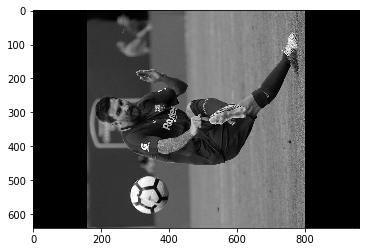

In [210]:
plt.imshow(dst, cmap='gray')
plt.show()